# BASICS OF PYTHON | SESSION 5

---
Sina Shafiezadeh | October 2024
---


Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Share your public repository** [HERE](https://docs.google.com/spreadsheets/d/1bveNOi9efLNgxqxh5uH5xhNG57bQ7DPCnG_sLAX4wmY/edit?usp=sharing).


# 1.&nbsp;Data Importing

In [76]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Import dataset: upload from the local machine
from google.colab import files

uploaded = files.upload()

filename = next(iter(uploaded))
data = pd.read_csv(filename)


Saving data.csv to data (5).csv


# 2.&nbsp;Data Cleaning (overview)

In [77]:
# Check data
print(data)
print(data.shape)

dataset_info = data.info()
dataset_head = data.head()

print(data.info())
print(data.describe())


      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1            

# 3.&nbsp;Data Cleaning (interpretability)

In [78]:
# Convert 'duration_ms' from milliseconds to minutes and round to 2 decimal places
for i in range(len(data)):
    data["duration_ms"][i] = round(data["duration_ms"][i] / 60000, 2)

data = data.rename(columns={"duration_ms": "duration_min"})

numeric_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                   'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_min']
print(data)


      Unnamed: 0  acousticness  danceability  duration_min  energy  \
0              0       0.01020         0.833          3.41   0.434   
1              1       0.19900         0.743          5.45   0.359   
2              2       0.03440         0.838          3.10   0.412   
3              3       0.60400         0.494          3.32   0.338   
4              4       0.18000         0.678          6.55   0.561   
...          ...           ...           ...           ...     ...   
2012        2012       0.00106         0.584          4.57   0.932   
2013        2013       0.08770         0.894          3.04   0.892   
2014        2014       0.00857         0.637          3.45   0.935   
2015        2015       0.00164         0.557          3.09   0.992   
2016        2016       0.00281         0.446          3.41   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1

<ipython-input-78-5469a35642d1>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["duration_ms"][i] = round(data["duration_ms"][i] / 60000, 2)
<ipython-input-78-5469a35642d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a c

# 4.&nbsp;Data Cleaning (reduction)

In [79]:
#Remove unnecessary columns
data = data.drop(columns=['Unnamed: 0', 'song_title', 'artist'])


# 5.&nbsp;Data Cleaning (noisy data)

In [80]:
# Step 2: Check for suspicious values in 'energy' by sorting
dataset = dataset.sort_values("energy", axis=0, ascending=False)
print(dataset)

      acousticness  danceability  duration_min  energy  instrumentalness  key  \
1299      0.002560         0.468          3.36  0.9980          0.000000    9   
1322      0.000049         0.428          3.70  0.9970          0.955000    8   
1297      0.000015         0.455          5.19  0.9940          0.001200    4   
1347      0.000017         0.329          2.26  0.9930          0.641000    6   
1332      0.000290         0.424          4.53  0.9920          0.000021    5   
...            ...           ...           ...     ...               ...  ...   
1596      0.995000         0.333          3.69  0.0288          0.819000    1   
1598      0.953000         0.156          7.63  0.0230          0.338000   10   
1537      0.810000         0.421          5.63  0.0161          0.002100    2   
1595      0.915000         0.277          4.93  0.0156          0.006540    7   
1594      0.995000         0.471          1.37  0.0148          0.934000    3   

      liveness  loudness  m

# 6.&nbsp;Data Cleaning (completeness)

In [81]:
## I asked chat.gpt for help for these lines !!!! I did this to try a new thing

# Define a function to detect and replace outliers with the mean
def replace_outliers_with_mean(data, column_name, z_threshold=3):
    # Calculate the mean of the column
    column_mean = data[column_name].mean()

    # Calculate the Z-score to identify outliers
    z_scores = np.abs(stats.zscore(data[column_name]))

    # Replace values with a Z-score greater than the threshold with the mean
    data.loc[z_scores > z_threshold, column_name] = column_mean

# Apply the function to all numeric columns to reduce complexity
numeric_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                   'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'duration_min']

for col in numeric_columns:
    replace_outliers_with_mean(data, col)

# Verify the changes
print(data.describe())


       acousticness  danceability  duration_min       energy  \
count   2017.000000   2017.000000   2017.000000  2017.000000   
mean       0.178144      0.618914      3.999482     0.686419   
std        0.244952      0.160269      1.063764     0.202576   
min        0.000003      0.148000      0.270000     0.053200   
25%        0.009630      0.514000      3.330000     0.570000   
50%        0.063300      0.631000      3.820000     0.715000   
75%        0.246000      0.738000      4.430000     0.846000   
max        0.967000      0.984000      8.200000     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.129596     5.342588     0.177929    -6.748177     0.612295   
std            0.267490     3.648240     0.127827     2.897256     0.487347   
min            0.000000     0.000000     0.018800   -18.275000     0.000000   
25%            0.000000     

# 7.&nbsp;Data Exploring


In [82]:
## I did this to show that I learned that function.

# Create a new dataframe "selected_data" based on conditions
# Select rows where 'energy' is greater than 0.5, 'tempo' is less than or equal to 120, and 'danceability' is greater than 0.7
selected_data = data[
    (data['energy'] > 0.5) &
    (data['tempo'] <= 120) &
    (data['danceability'] > 0.7)
]


selected_data.info()

# Display the selected data
print(selected_data)



<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 5 to 2013
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      278 non-null    float64
 1   danceability      278 non-null    float64
 2   duration_min      278 non-null    float64
 3   energy            278 non-null    float64
 4   instrumentalness  278 non-null    float64
 5   key               278 non-null    int64  
 6   liveness          278 non-null    float64
 7   loudness          278 non-null    float64
 8   mode              278 non-null    int64  
 9   speechiness       278 non-null    float64
 10  tempo             278 non-null    float64
 11  time_signature    278 non-null    float64
 12  valence           278 non-null    float64
 13  target            278 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 32.6 KB
      acousticness  danceability  duration_min  energy  instrumentalness  key  \
5          0.0

In [83]:
## I did this to show that I learned that function.

# Select rows where 'energy' is greater than 0.3 and 'valence' is less than 0.7, then sort by 'tempo'
sorted_data = data[
    (data['energy'] > 0.3) &
    (data['valence'] < 0.7)
].sort_values(by=['tempo'], ascending=False)


sorted_data.info()

# Display the sorted data
print(sorted_data)



<class 'pandas.core.frame.DataFrame'>
Index: 1428 entries, 826 to 1531
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1428 non-null   float64
 1   danceability      1428 non-null   float64
 2   duration_min      1428 non-null   float64
 3   energy            1428 non-null   float64
 4   instrumentalness  1428 non-null   float64
 5   key               1428 non-null   int64  
 6   liveness          1428 non-null   float64
 7   loudness          1428 non-null   float64
 8   mode              1428 non-null   int64  
 9   speechiness       1428 non-null   float64
 10  tempo             1428 non-null   float64
 11  time_signature    1428 non-null   float64
 12  valence           1428 non-null   float64
 13  target            1428 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 167.3 KB
      acousticness  danceability  duration_min    energy  instrumentalness  \
826       0.0

In [84]:
## I did this to show that I learned that function.

# Group by 'key' (which is a categorical column) and calculate the mean of the other numeric columns
grouped_data = data.groupby(['key']).mean()

# Display the grouped results
print(grouped_data)


     acousticness  danceability  duration_min    energy  instrumentalness  \
key                                                                         
0        0.218301      0.615759      3.990557  0.631760          0.141853   
1        0.157644      0.628790      3.908913  0.724443          0.108171   
2        0.198383      0.598245      3.978701  0.662919          0.123995   
3        0.305705      0.577413      4.093415  0.635362          0.194413   
4        0.202947      0.612181      3.801097  0.674089          0.094833   
5        0.219092      0.612958      4.101059  0.654411          0.154994   
6        0.125925      0.621730      3.968367  0.719044          0.122710   
7        0.178345      0.616552      3.912952  0.693658          0.143182   
8        0.162974      0.651243      4.053605  0.673298          0.132265   
9        0.143574      0.622136      3.956468  0.701450          0.108070   
10       0.200933      0.632563      4.199966  0.698238          0.158893   

# 8.&nbsp;Data Analysis

In [85]:
data.corr()

,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
acousticness,1.000000,-0.142394,0.012013,-0.564863,0.078579,-0.078834,-0.113963,-0.413655,0.067856,-0.099441,-0.112979,-0.156468,-0.114612,-0.101819
danceability,-0.142394,1.000000,0.038516,0.005432,-0.117562,0.026771,-0.106351,-0.021343,-0.048805,0.168375,-0.124250,0.129901,0.442801,0.180578
duration_min,0.012013,0.038516,1.000000,-0.132470,0.281830,0.044720,-0.037151,-0.233535,-0.074303,-0.085169,-0.054614,-0.022323,-0.130240,0.144827
energy,-0.564863,0.005432,-0.132470,1.000000,-0.097146,0.069536,0.193873,0.676229,-0.063799,0.119652,0.160752,0.161340,0.255889,0.020201
instrumentalness,0.078579,-0.117562,0.281830,-0.097146,1.000000,-0.000124,-0.001433,-0.267407,-0.038594,-0.143242,-0.006600,-0.067911,-0.185888,0.163636
key,-0.078834,0.026771,0.044720,0.069536,-0.000124,1.000000,0.068317,0.041592,-0.195040,0.012131,0.043422,0.024937,0.032485,0.033594
liveness,-0.113963,-0.106351,-0.037151,0.193873,-0.001433,0.068317,1.000000,0.143762,-0.001928,0.106383,0.001466,0.022687,-0.058991,0.027469
loudness,-0.413655,-0.021343,-0.233535,0.676229,-0.267407,0.041592,0.143762,1.000000,-0.030131,0.095213,0.120849,0.107473,0.114980,-0.191744
mode,0.067856,-0.048805,-0.074303,-0.063799,-0.038594,-0.195040,-0.001928,-0.030131,1.000000,-0.032844,-0.060141,-0.039038,-0.032879,-0.072336
speechiness,-0.099441,0.168375,-0.085169,0.119652,-0.143242,0.012131,0.106383,0.095213,-0.032844,1.000000,0.081584,0.072329,0.059423,0.157377


In [86]:
# My question is: is there a significant difference in energy between songs that belong to different modes??

# Split the data into two groups based on the 'mode' column (0 and 1)
data_group1 = data[data["mode"] == 0]["energy"]
data_group2 = data[data["mode"] == 1]["energy"]

# Calculate the variance of the two groups
print("Variance of group 1:", np.var(data_group1))
print("Variance of group 2:", np.var(data_group2))

# Define a function to calculate the Student's t-test
def get_ttest(x, y):
    result = stats.ttest_ind(a=x, b=y, equal_var=True)
    return result

# Perform the t-test between the two groups
ttest_result = get_ttest(data_group1, data_group2)
print("T-test results:", ttest_result)

## There IS a significant difference in energy between songs that belong to different modes (mode = 0 or mode = 1).
## Since the p-value is less than 0.05, i can conclude that the energy of songs in mode 0 is statistically different
##from the energy of songs in mode 1.


Variance of group 1: 0.03775827935216791
Variance of group 2: 0.042807541355238656
T-test results: TtestResult(statistic=2.869682574934068, pvalue=0.004151673387155598, df=2015.0)


In [87]:
## I did this to show that I learned that function (and because i had more time)

## Question 2: is there a significant difference in the variability of energy between songs with low valence and high valence?
# Split the data into two groups based on different levels of 'valence' (high and low)
data_group3 = data[data["valence"] < 0.4]["energy"]  # Songs with low valence
data_group4 = data[data["valence"] > 0.7]["energy"]  # Songs with high valence

# Calculate the variance of the two groups
print("Variance of group 3 (low valence):", np.var(data_group3))
print("Variance of group 4 (high valence):", np.var(data_group4))

# Use the 'get_ttest' function to compare the two groups
ttest_result = get_ttest(data_group3, data_group4)
print("T-test results between the two groups (low valence vs high valence):", ttest_result)

## There is a significant difference in the variability of energy between songs with low
## valence and high valence. Specifically, songs with low valence exhibit a greater dispersion
##in energy values compared to those with high valence.

Variance of group 3 (low valence): 0.05850262801574829
Variance of group 4 (high valence): 0.023750183883515793
T-test results between the two groups (low valence vs high valence): TtestResult(statistic=-9.268274393823162, pvalue=7.950845302221995e-20, df=1258.0)


In [88]:
## I did this to show that I learned that function (and because i had more time)
## Question 3: is there a significant difference in the energy levels of songs across different tonalities (keys)??
# Define groups based on the key (tonality)
data_group5 = data[data["key"] == 1]["energy"]
data_group6 = data[data["key"] == 2]["energy"]
data_group7 = data[data["key"] == 3]["energy"]

# Perform a one-way ANOVA test to compare the groups
anova_result = f_oneway(data_group5, data_group6, data_group7)

# Print the results
print("ANOVA test results:", anova_result)

## The energy levels of songs vary significantly
## across different keys. This means that at least one
## key group has a different mean energy level compared to the others.

ANOVA test results: F_onewayResult(statistic=8.094155568263572, pvalue=0.00034701699833844713)


# 9.&nbsp;Data Visualization

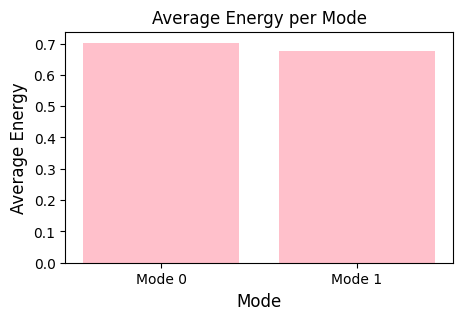

In [90]:
import matplotlib.pyplot as plt

# Calculate the average energy for each mode
energy_avg = data.groupby(['mode']).mean()

# Extract the values to plot
modes = ["Mode 0", "Mode 1"]
energy = energy_avg["energy"].tolist()

# Create the bar chart
fig = plt.figure(figsize=(5, 3))

# Creating the bar chart
plt.bar(modes, energy, color='pink', width=0.8)

# Axis labels
plt.xlabel("Mode", fontsize=12)
plt.ylabel("Average Energy", fontsize=12)

# Title of the chart
plt.title("Average Energy per Mode", fontsize=12)

# Display the chart
plt.show()



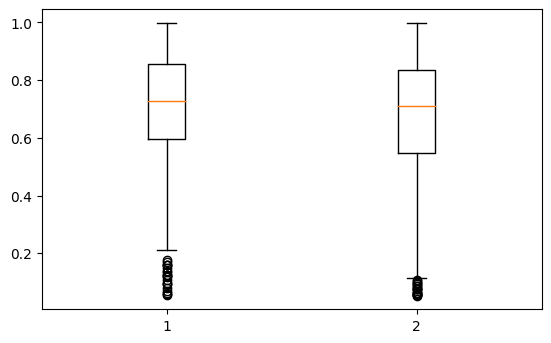

In [92]:
import matplotlib.pyplot as plt

# Extract the data for both modes (Mode 0 and Mode 1)
mode0_energy = data[data["mode"] == 0]["energy"].to_numpy()
mode1_energy = data[data["mode"] == 1]["energy"].to_numpy()

# Prepare the data for the box plot
boxplot_data = [mode0_energy, mode1_energy]

# Create the figure and axes
fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes([0, 0, 1, 1])

# Create the box plot
ax.boxplot(boxplot_data)

# Display the plot
plt.show()

#I don't know why it is so strange/ugly

# 10.&nbsp;Data Exporting

In [74]:
# saving the dataframe
data.to_csv('cleaned_data_Agnese.csv', header=True, index=True)
